In [10]:
## This notebook contains what you need to assess single new sequence and compare it to existing stats

import os
from esm import pretrained, Alphabet, BatchConverter
from typing import List, Tuple, Optional, Dict, NamedTuple, Union, Callable
import itertools
import string
from pathlib import Path
import numpy as np
import torch
from scipy.spatial.distance import squareform, pdist, cdist
import matplotlib.pyplot as plt
import matplotlib as mpl
from Bio import SeqIO
from tqdm import tqdm
import pandas as pd
import esm
import seaborn as sns


from get_biochemical_benchmarks import (
    get_basic_props,
    query # this gets some sampled stats, but could take a while to run
)

from get_perplexity_benchmarks import (
    compute_masked_perplexity_simplified,
    compute_estimated_masked_perplexity,
    compute_estimated_perplexity_by_cross_entropy
)

In [ ]:
# load previous samples and stats
biochemical_sample = pd.read_csv("biochemical_benchmarks/uniprot50_biochemical_summary.csv")
global_keys = list(biochemical_sample.columns).pop("sequence_id")
biochemical_stats = pd.read_csv("biochemical_benchmarks/uniprot50_biochemical_stats.csv")
print(global_keys)
biochemical_stats

['length', 'gravy', 'instability_index', 'isoelectric_point', 'aromaticity', 'charge_at_ph7', 'sequence_id']


,Unnamed: 0,length,gravy,instability_index,isoelectric_point,aromaticity,charge_at_ph7
0,count,6.864257e+06,6.864257e+06,6.864257e+06,6.864257e+06,6.864257e+06,6.864257e+06
1,mean,2.848442e+02,-2.265938e-01,4.251655e+01,7.307115e+00,8.211672e-02,-1.851706e+00
2,std,3.387145e+02,4.643056e-01,1.500451e+01,2.154167e+00,3.686661e-02,1.966890e+01
3,min,1.100000e+01,-4.320000e+00,-7.686772e+01,4.050028e+00,0.000000e+00,-3.298783e+03
4,25%,1.080000e+02,-4.845361e-01,3.312532e+01,5.337261e+00,5.714286e-02,-6.097850e+00
5,50%,1.930000e+02,-2.492188e-01,4.118776e+01,6.819394e+00,7.936508e-02,-2.833196e-01
6,75%,3.480000e+02,-9.604520e-03,5.029230e+01,9.262318e+00,1.035197e-01,4.809689e+00
7,max,4.949900e+04,4.371795e+00,5.591109e+02,1.199997e+01,9.767442e-01,2.464782e+03


In [ ]:
query()

running query


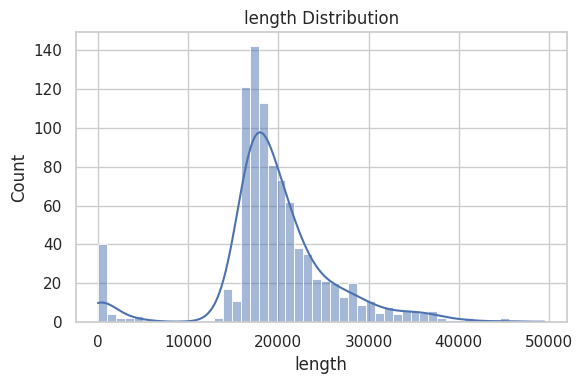

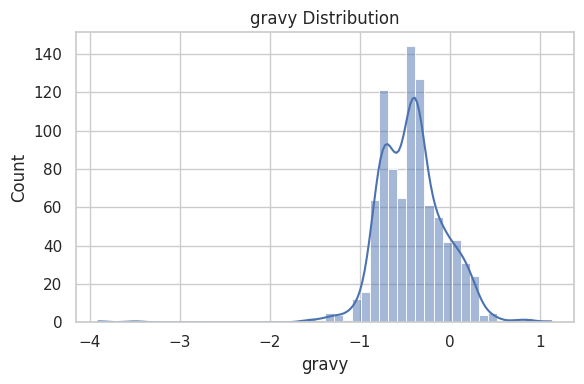

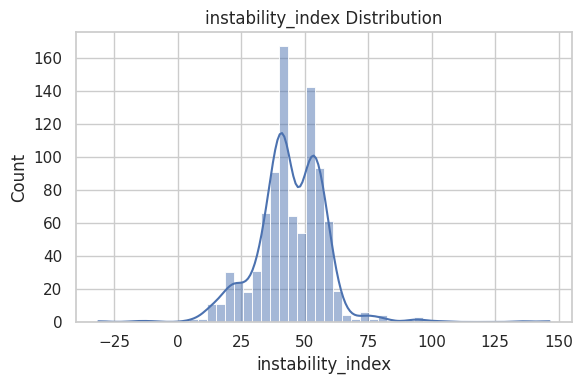

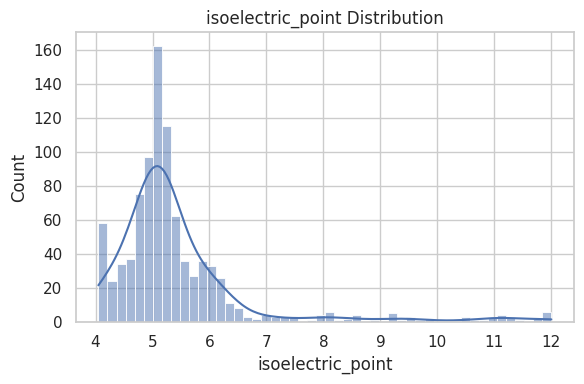

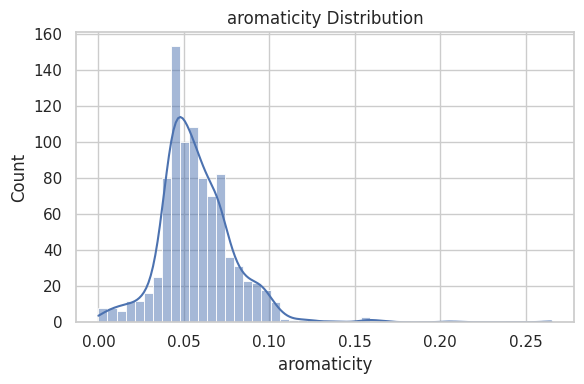

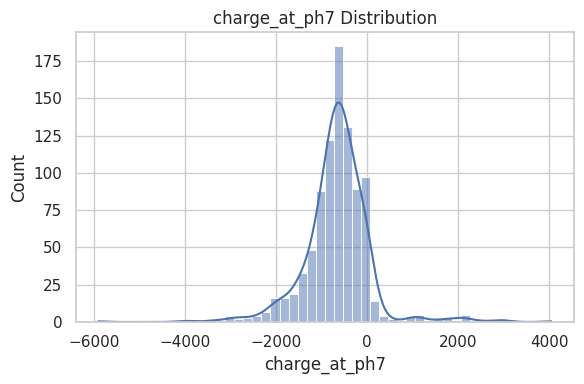

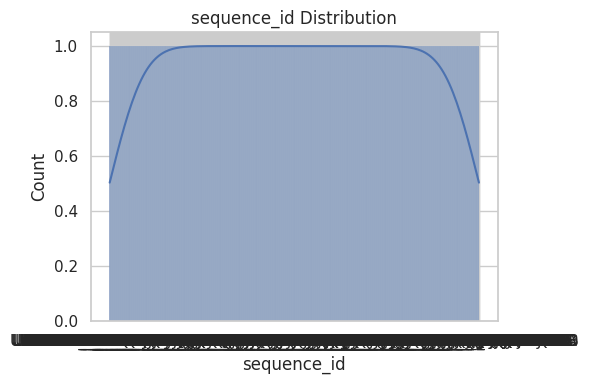

In [14]:
sns.set(style="whitegrid")
for key in global_keys:
    plt.figure(figsize=(6, 4))
    sns.histplot(biochemical_sample[key], kde=True, bins=50)
    plt.title(f"{key} Distribution")
    plt.xlabel(key)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

In [ ]:
sample_seq = "AAAAAAAAA"
new_sample = get_basic_props(sample_seq)
print(new_sample)

{'length': 9, 'gravy': 1.8000000000000003, 'instability_index': 8.88888888888889, 'isoelectric_point': 5.57001667022705, 'aromaticity': 0.0, 'charge_at_ph7': -0.20412541214591307}


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Original keys and new sample
global_keys = ['length', 'gravy', 'instability_index', 'isoelectric_point', 'aromaticity', 'charge_at_ph7']

sns.set(style="whitegrid")
for key in global_keys:
    plt.figure(figsize=(6, 4))
    sns.histplot(biochemical_sample[key], kde=True, bins=50)
    plt.axvline(new_sample[key], color='red', linestyle='--', linewidth=2, label='New Sample')
    plt.title(f"{key} Distribution")
    plt.xlabel(key)
    plt.ylabel("Count")
    plt.legend()
    plt.tight_layout()
    plt.show()
